# **Sales forecasting system**
### We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

### **Step 1:** Loading the dataset

In [2]:
# Loading the dataset from https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv
sales_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
sales_df.to_csv('../data/raw/sales.csv')
sales_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


### **Step 2:** Construct and analyze the timeserie

In [3]:
# Remove the time from the colum date in the dataframe
sales_df['date'] = pd.to_datetime(sales_df['date']).dt.date
sales_df.head()

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633


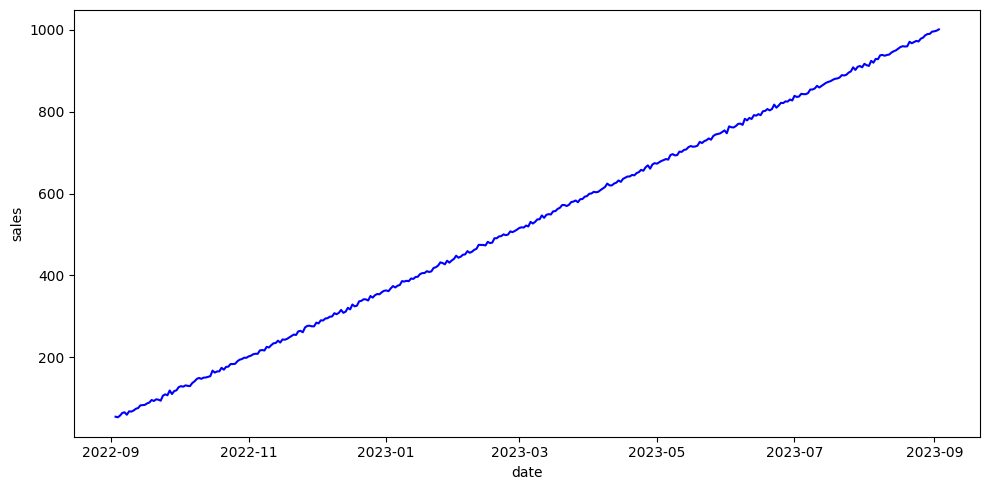

In [4]:
# Analysis of the time serie
# Plot the dataframe
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales_df, x = 'date', y = 'sales', color = 'blue')
sns
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
# Tren analysis
# define the descomposition variable
decomposition = seasonal_decompose(sales_df, period = 12)
decomposition

TypeError: float() argument must be a string or a number, not 'datetime.date'